# Day 1.2 - Pandas and Data Wrangling

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Load data files as `DataFrame` using Pandas.
* Learn how to select and manipulate columns and rows in a Pandas `DataFrame`.
* Apply core data wrangling techniques in `pandas`
* Understand the flexibility of the `pandas` library
* Be able to troubleshoot using documentations
</div>


# Part 1: Introduction to Pandas

* * * 

<a id='df'></a>

## Data Frames: Spreadsheets in Python

Tabular data refers to data that is organized in a table with rows and columns.

In scientific programming, tabular data is often called a **data frame**. In Python, the `pandas` package contains an object called `DataFrame` that implements this data structure.

## Importing Packages

A **package** is a collection of pre-written code in a sharable format in Python, usually for specific functionalities. Packages are created to make coding easier by allowing us to reuse solutions that others have already developed. In this notebook, we will work with a package called `pandas`.

Before using a package like `pandas`, we need to **import** it into our current Python session. Importing is done with the `import` keyword. By running `import [PACKAGE_NAME]`, we make the package’s functionality available for use in our code.

For some packages, like `pandas`, we often use an **alias**, or a shorter nickname, when importing. This helps save time and makes our code cleaner when referring to the package.

Now, let’s import the `pandas` package and assign it the alias `pd`.  

In [1]:
import pandas as pd

### `ImportError`

If you encounter an `ImportError` when trying to import a package, it means that package has not been installed in your Python environment or is not accessible from your current environment. 

You can resolve this by using the command `!conda install package_name` directly within a Jupyter cell, replacing `package_name` with the name of the package you need. 

Why the exclamation mark `!`? It allows you to run **shell commands** from within a Jupyter Lab notebook. A **shell command** is a simple instruction you type to tell your computer to do something, like installing a program or managing files.In Jupyter Lab, you can use these instructions by starting with an exclamation mark `!` in a cell to make your computer do tasks, like installing a package.

In [ ]:
# Uncomment the following line to install pandas
#!conda install pandas

### 🦾 Challenge 1: From Dictionary to Data Frame

You can easily build a data frame from a dictionary. However, the following code gives an error. Why does it have an error? 

💡 **Tip:** Google the line at the bottom of the error message if you need help!

In [4]:
patient = ['Lee', 'Kim', 'Jang']
sex = ['M', 'F', 'F']
age = [40, 76, 46]

medical_dict = {
    'patient': patient,
    'sex': sex,
    'age': age}

pd.DataFrame(medical_dict)

,patient,sex,age
0,Lee,M,40
1,Kim,F,76
2,Jang,F,46


## Our Data

Throughout the course, we are going to use a dataset [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). This dataset was created by combining different datasets on heart diseases and patient infomraiton. 

## Reading CSV Files

In the cell below, we use the `read_csv()` method, which takes a string as its main argument. This string consists of a **relative file path** pointing to the file. It is **relative** because we are referring to the location of the file in relation to the current working directory, rather than using an absolute path that specifies the entire directory structure from the root.

💡 **Tip:** a directory is also called a folder.

* `../` means "go up one folder from where this notebook is" -- which is the "lessons" folder.
* `data/` means 'go into a folder called "data".
* `heart.csv` is the file name we are accessing within that "data" folder.

💡 **Tip:** When dealing with file paths, especially in complex directory structures, remember that relative paths like `../folder_name` only take you up one directory level at a time. If you need to traverse multiple levels, you can chain these commands together (e.g., `../../folder_name` to go up two levels). 

Additionally, if your path requires navigating through several folders, consider using an **absolute path** from the home folder (`~/`), or a well-defined environment variable that points to a common base folder. This approach reduces errors and makes your code more portable across different systems.

In [6]:
df = pd.read_csv('../data/heart.csv')

The `.head()` method will show the first five rows of a Data Frame by default. 

💡 **Tip**: Put an integer in between the parentheses to specify a different number of rows. 

In [9]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


### More on .csv Files
As data scientists, we'll often be working with these **Comma Seperated Values (.csv)** files. 

Comma separated values files are commonly used because they are relatively small and easily readable in spreadsheet programs or text readers. A comma separated values file is just a text file that contains data but that has commas (or other separators) to indicate column breaks.

`Pandas` package contains a function [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

If your data is in a different format like `tsv` or `json`, we can either change the parameters of `read_csv()` method or use a differnet method like [`read_json()`](https://pandas.pydata.org//docs/reference/api/pandas.read_json.html).

<a id='columns'></a>

## Selecting Columns
Now that we have our `DataFrame`, we can select a single column by selecting the name of that column. This uses bracket notation (like we do when accessing lists).


In [16]:
df['ChestPainType']

0      ATA
1      NAP
2      ATA
3      ASY
4      NAP
      ... 
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: ChestPainType, Length: 918, dtype: object

The data type of this column is a `Series`. It's like a list. You can index a `Series` object just like you can with a list!

In [17]:
df[['ChestPainType']]

,ChestPainType
0,ATA
1,NAP
2,ATA
3,ASY
4,NAP
...,...
913,TA
914,ASY
915,ASY
916,ATA


In [18]:
pain_type = df['ChestPainType']
pain_type[0]

'ATA'

#### Attribute Information

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

## Using Methods on Columns

`DataFrame` objects come with their own methods, many of which operate on a single column of the DataFrame. 

For example, we can identify the number of unique values in each column by using the `nunique()` method:

In [12]:
df['ChestPainType'].nunique()

4

Usually, a package provides **documentation** that explains all of its functionalities. Let's have a look at the documentation for a method called `value_counts()` [online](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). 

🔔 **Question**: What does `value_counts()` do in the code below?

In [13]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

## 🥊 Challenge 2: Putting Methods in Order

In the following code we want to to find the top-3 most frequently occurring continents in our data. Put the following code fragments in the right order to get this information!

In [21]:
df['Age'].value_counts().head(3)

Age
54    51
58    42
55    41
Name: count, dtype: int64

## Attributes 

You can also look at certain properties of data, called **attributes**, using `pandas`. 

Attributes are like variables: they give you more information about the data that you have. Methods are like functions: they allow you to do something with data.

For instance, we can easily check the column names of our data frame using the `columns` **attribute**.

In [22]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

🔔 **Question**: Here's another popular attribute: `shape`. What do you think it does?

In [23]:
df.shape

(918, 12)

## Jupyter Autocomplete

Jupyter Notebooks allow for tab completion, just like many text editors. If you begin typing the name of something (such as a variable) that already exists, you can simply hit **Tab** and Jupyter will autocomplete it for you. If there is more than one possibility, it will show them to you and you can choose from there. 

🔔 **Question:** Below we are selecting a column in our `DataFrame`. See what happens when you hit `TAB`! What are you seeing?

In [ ]:
# YOUR CODE HERE
df['ChestPainType'].

<a id='rows'></a>

## Selecting Rows

What if we wanted to get some rows in our dataset based on some condition? For example, what if we just wanted a select only the rows for which the chest pain type is Atypical Angina? Or only rows from a particular age?

We can use so-called **value comparison operators** for this. For instance, to get only the rows that include data points for `ATA`, we can use `==`.

In [24]:
df['ChestPainType'] == 'ATA'

0       True
1      False
2       True
3      False
4      False
       ...  
913    False
914    False
915    False
916     True
917    False
Name: ChestPainType, Length: 918, dtype: bool

💡 **Tip**: Fancy terminology alert: the above Series is called a **Boolean mask**. It's like a list of True/False labels that we can use to filter our Data Frame for a certain condition! We'll cover this further in Python Intermediate.

Here, we create a subset of our Data Frame with the fancy Boolean mask we just created. 

In [25]:
# Getting only the data points for ATA
df[df['ChestPainType'] == 'ATA']

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0


Note that the output of this operation is a **new data frame**! We can assign it to a new variable so we can work with this subsetted data frame. Let's do it again:

In [26]:
ata_df = df[df['ChestPainType'] == 'ATA']
ata_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### 🦾 Challenge 3: Subsetting Data Frames

Besides `==` we can use [other operators](https://www.w3schools.com/python/gloss_python_comparison_operators.asp) to compare values. For instance:
- `<` less than
- `>` greater than

Fill in the code below to subset our data frame to include only people with `Age` less than 50.

In [27]:
df.shape

(918, 12)

In [33]:
# YOUR CODE HERE
ata_df = df[df['Age'] df.shape<50]
ata_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [35]:
ata_df.shape

(291, 12)

### 🦾 Challenge 4: Subsetting and Calculating the Mean

Let's make use of subsetting to do some calculation! Calculate the **mean age** for a cheset pain type of your choice. 

This means you will have to:
1. Subset the `ChestPainType` column using a Boolean mask.
2. Take the `Age` column from that subset.
3. Apply a Pandas method to get the mean from that column.

You might not know how to get the mean of a column – yet! If that's the case, **use your search engine**.

1. Enter the name of the computer language or package, and your question (for instance: "Pandas calculate mean").
2. Read and compare the results you find.
3. Try 'em out!

In [56]:
# YOUR CODE HERE
ata_df = df[df['ChestPainType'] == 'ATA']
print(ata_df['Age'].mean())

asy_df = df[df['ChestPainType'] == 'ASY']
print(asy_df['Age'].mean())

ta_df = df[df['ChestPainType'] == 'TA']
print(ta_df['Age'].mean())

nap_df = df[df['ChestPainType'] == 'NAP']
print(nap_df['Age'].mean())

49.24277456647399
54.95967741935484
54.82608695652174
53.310344827586206


In [57]:
print(df[df['HeartDisease']==1]["Age"].mean())

55.8996062992126


## Functions in Data Frames

Remeber making your own functions? We can apply our custom functions to data frames as well. 

We can do this because Pandas makes use of so-called **vectorized** operations. This is just a fancy term for operations that can be performed on an entire row or column. 

For instance, if we'd want to add 10 to each value of `df['Age']`, we would simply do the following:

In [59]:
df['Age'] + 10

0      50
1      59
2      47
3      58
4      64
       ..
913    55
914    78
915    67
916    67
917    48
Name: Age, Length: 918, dtype: int64

Here's what's happening to our DataFrame when we perform that operation:
<img src="../images/vectorized.png" alt="Vectorization in Pandas with scalar" width="600"/>

## How to `apply()` a Function

We can also use a more general technique: `apply()`. `apply()` takes any function and **applies** it over every entry of the column. Let's see how we can do the same operation as above using `apply()`.

In [ ]:
def add_10(x):
    return x + 10

df['Age'].apply(add_10)

### 🦾 Challenge 5: `apply()` a Conditional Function

Say that we want to create a new column in our dataset that classifies our datapoints in terms of the level of cholesterol level using the [CDC guidlines](https://www.cdc.gov/cholesterol/about/index.html). A total cholesterol level of less than 200 mg/dL (5.17 mmol/L) is normal. A total cholesterol level of 200 to 239 mg/dL (5.17 to 6.18 mmol/L) is borderline high. A total cholesterol level of 240 mg/dL (6.21 mmol/L) or greater is high. 

A good way to approach these kinds of problems is to write down all the steps you need to take. Then, you write your code by following the steps. In this case, we need to do the following:

1. Start a function called `assign_level` that takes in one parameter, `i`.
2. Write an if-elif-else statement that checks `i`, based on the following rules:
    - `if` it is more than 240, `return` the string `very high`. 
    - `elif` it is more than 200, `return` the string `borderline high`. 
    - `elif` it is more than 150, `return` the string `normal`. 
    - `elif` it is less than or equal to 150, `return` the string `low`. 
    - `else`, return `np.nan` (this is a NaN value).
3. Use `.apply()` on the `Cholesterol` column, using your new `assign_level` function as the argument. Assign the output to a new column in our DataFrame, called `Cholesterol_level`.

In [64]:
import numpy as np

In [70]:
# YOUR CODE HERE
def assign_level (i):
    if i>240:
        return "very high"
    elif i>200:
        return "borderline high"
    if i>150:
        return "normal"
    if i<=150:
        return "low"
    else:
        return np.nan

In [71]:
df['Cholesterol'].apply(assign_level)

0            very high
1               normal
2            very high
3      borderline high
4               normal
            ...       
913          very high
914             normal
915                low
916    borderline high
917             normal
Name: Cholesterol, Length: 918, dtype: object

If you've done this correctly, the following code should produce a barplot of the different income levels in our data!

In [74]:
df['Cholesterol_level']=df['Cholesterol'].apply(assign_level)

<Axes: xlabel='Cholesterol_level'>

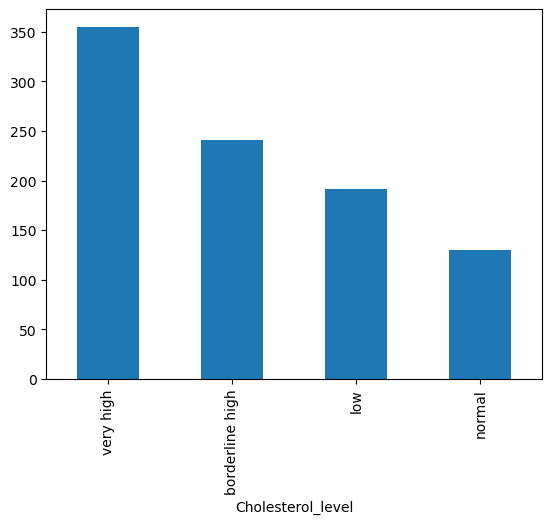

In [76]:
df['Cholesterol_level'].value_counts().plot(kind='bar')

<a id='vector'></a>

## Iteration: Vectorization

In [ ]:
import pandas as pd

df.head()

We don't have data that really makes sense to apply vectorization for this data set. However, if you want to perform an operation between two columns, you don't have to create an iteration. In Pandas, we will can use [**vectorized**](https://www.geeksforgeeks.org/vectorized-operations-in-numpy) operations. We can just multiply two columns, and Pandas will know we want to multiply each row of both columns!

In [ ]:
vectorized = df['RestingBP'] * df['Cholesterol']
vectorized[:5]

This doesn't make sense to mutliply these two columns and this is just to demostrate how this would work!

⚠️ **Warning:** Note that the output to this operation is not a list, but a `Series` – a data type specific to Pandas. It is like a list, but it is **labeled**. 

Vectorized operations like these are really handy, and they replace most of the use of `for`-loops in a context of Pandas and data analysis.

<a id='df_meth'></a>

## Methods for `DataFrame` Objects

Pandas has many methods: some allow you to work with entire DataFrames, while others operate on individual columns. This section focuses on learning to distinguish between these methods.

Some methods work on entire DataFrames. We can look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) to see all the methods and attributes that are available for `DataFrame` objects. Learning how to read documentation is an important skill! 

## Summary Statistics
The [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method will give some summary statistics for a `DataFrame`. Run the cell below to see how it works.

In [77]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 🦾 Challenge 6: Check the Data Type

What is the data type of the output of `describe()`?

In [ ]:
# YOUR CODE HERE


## Scatter Plots

Pandas has a convenient [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method that allows you to create different kinds of visualizations. Some of these visualizations can be called on a DataFrame object.

For instance, **scatter plots** visualize the relationship between different variables (columns) in a DataFrame. This is why we run the method on an entire DataFrame.

We can create a scatter `plot()` by specifying the columns to use for the `x` and `y` axes. 

<Axes: xlabel='Age', ylabel='RestingBP'>

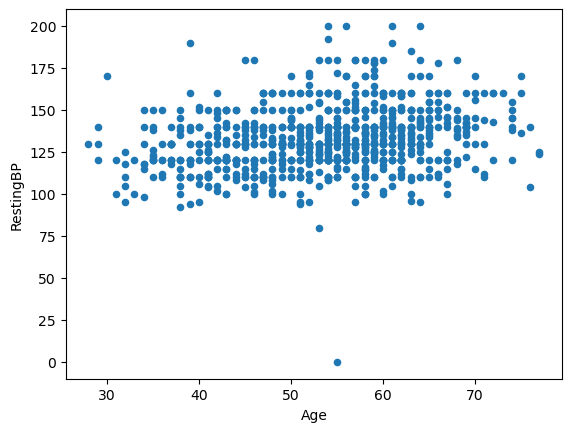

In [85]:
df.plot(kind='scatter', x='Age', y='RestingBP')

## Sorting Values

Let's say we want to find the heart with the highest `gdpPercap`.

If we want to sort the values in a DataFrame we can use the [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method on a DataFrame. It takes as an argument the column we want to sort the DataFrame on. 

⚠️ **Warning:** By default, `sort_values()` sorts in **ascending order**.

In [87]:
df.sort_values('Age',ascending=False)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_level
814,77,M,ASY,125,304,0,LVH,162,Y,0.0,Up,1,very high
447,77,M,ASY,124,171,0,ST,110,Y,2.0,Up,1,normal
688,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,0,normal
541,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1,low
556,75,M,ASY,160,310,1,Normal,112,Y,2.0,Down,0,very high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0,borderline high
219,29,M,ATA,140,263,0,Normal,170,N,0.0,Up,0,very high
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0,borderline high
170,29,M,ATA,120,243,0,Normal,160,N,0.0,Up,0,very high


🔔 **Question:** Add the argument `ascending=False` when running `sort_values()` in the cell above. What happens?

## Bar Plots

Bar plots show the relationship between a numeric and a categoric variable. Here, we use the `ChestPainType` (categorical) and `RestingBP` (numeric) columns. Use a bar plot when you want to illustrate differences in frequencies of some category.

In the below cell, we retrieve the 10 data points with the **low age** in our data using the `sort_values()` method, and then plot those data points in a bar plot.

💡 **Tip**: Note that `plot.bar()` is a method of its own, and is an alternative to using `plot()` with the `type=bar` argument.

In [ ]:
# Sort values based on low age, get top 10
young = df.sort_values('Age', ascending=True)[:20]

young_grouped = young.groupby('ChestPainType').max().reset_index()
# Visualize with bar plot 
young_grouped.plot.bar(x='ChestPainType', y='RestingBP', figsize=(6,4));

<a id='series_meth'></a>

## Methods for `Series` Objects

Some Pandas methods work on `Series` objects – single columns – instead of entire DataFrames.

For instance, what if we wanted to calculate the median of life expectancy? We'd need to select just one column to operate on. 

Recall that we can select an individual column with bracket notation. This is analogous to indexing a list.

🔔 **Question**: What is the type of the output of the below cell?

In [ ]:
df['Cholesterol']

A single column of pandas is a `Series` object. This can be treated as a list or other iterable, and allows for you to do calculations over it. 

We can look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) to see the methods and attributes that are available for `Series` objects. If we want the median, we can use the `median()` function.

In [ ]:
df['Cholesterol'].median()

## Counting Values

There are many methods for summarizing DataFrames (which often are assigned as `df`). For instance, `value_counts()` returns a `Series` containing counts of unique values.

In [ ]:
df.value_counts()

However, `value_counts()` also works on a single column!

In [ ]:
df['Cholesterol'].value_counts()

## Histograms

A histogram shows the distribution of a variable using binned values. We can call this using the syntax: `df[column].plot(kind='hist')`. Use a histogram if you want to show distributions of continuous variables.

📝 **Poll PyFun 5-3:** Try changing the value for the `bins` parameter. What does the `bins` parameter seem to be determining?</span>

In [ ]:
df['Cholesterol'].plot(kind='hist', title='Histogram of Cholesterol', bins=10)

### 🦾 Challenge 7: Combining loops with graphs
1. Make a list of cheset pain types and store in a variable named `pain_type`.
2. Complete to make function `plot_restingBP`

In [ ]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
# Add comments
pain_type = [..., ..., ...]

# Add comments
def plot_restingBP(..., ...):
    for ... in ...:
        heart_data = df[df['ChestPainType'] == ...]
        plt.scatter(heart_data['Age'], heart_data['RestingBP'], label=...)
    plt.xlabel('Age')
    plt.ylabel('Resting Blood Pressure (mm Hg)')
    plt.title('Resting Blood Pressure by Age and Chest Pain Type')
    plt.legend()
    plt.show()

# Add comments
plot_restingBP(df, pain_type)

💡 **Tip**: Notice we have added labels and title to the plot using  `plt.xlabel()`, `plt.ylabel()`, and `plt.title()`. See [this resource](https://www.w3schools.com/python/matplotlib_labels.asp) for more information!

# Part 2: Python Data Wrangling with `pandas`


In this notebook, we provide an introduction to **data wrangling with Python**. We will be using the `pandas` package, which provides a rich set of tools for manipulating data. **Data wrangling** is the process of transforming and preparing raw data into a structured, clean, and usable format for analysis. It involves a series of tasks aimed at addressing inconsistencies, errors, or missing data while organizing the data to meet specific analytical requirements.

We'll use worked examples and practice on real data to learn the core techniques of data wrangling -- how to index, manipulate, merge, group, and plot data -- in `pandas`. 


In [88]:
# Imports pandas and assign it to the variable `pd`
import pandas as pd

# We often import NumPy (numerical python) with pandas
# we will import that and assign it to the variable `np`
import numpy as np

# Load matplotlib for plotting later in the workshop
import matplotlib.pyplot as plt
%matplotlib inline

`pandas` has a `read_csv()` function that allows us to easily import tabular data. The function returns a `DataFrame` object, which is the main object `pandas` uses to represent tabular data.

Notice that we call `read_csv()` using the `pd` abbreviation from the import statement above:

In [91]:
#write your code to import heart.csv data as heart here

heart = pd.read_csv('../data/heart.csv')

Let's run `type()` on the `heart` object and see what it is...

In [92]:
type(heart)

pandas.core.frame.DataFrame

Great! You've created a `pandas` `DataFrame`. We can look at our data by using the `.head()` method. By default, this shows the header (column names) and the first **five** rows.  

In [93]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


💡 **Tip**: If you'd like to see some other number of rows, you can pass an integer to `.head()` to return that many rows. For example `heart.head(6)` would return the first six rows.  



To find the number of rows, you can use the `.shape` attribute, which returns a [tuple](https://www.w3schools.com/python/python_tuples.asp): `(number of rows, number of columns)`

In [94]:
heart.shape

(918, 12)

To find out exactly what all of your columns are, you can use the `.columns` attribute.

In [95]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

To find out what kinds of data we have, we use the `.dtypes` attribute, which tells us which columns contain numerical data (e.g. `float64` or `int64` types) and which ones contain text (e.g. `object` types)

In [96]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Looking up functions
A useful method that generates various summary statistics is `.describe()`. This is a powerful method that will return a lot of information, so before we run it, let's look up exactly what it does.

💡 **Tip**: The [`pandas` documentation](http://pandas.pydata.org/pandas-docs/stable/) contains exhaustive information on every function, object, etc. in `pandas`. It can be a little difficult to navigate on its own, so it's typical to interact with the documentation primarily through Google searches.  

The following is a general worflow for learning about a function in `pandas`:
1. Google the `pandas` function, e.g. "pandas {insert function name}"
2. Find a result from pandas.pydata.org (the pandas documentation)
3. Read the summary of what the function does (at the top of the page), examine its arguments and what it returns.

<span color="purple">🔔 **Question:** Before running the following code, try using the general workflow detailed above to find out what `.describe()` returns. </span>  

In [ ]:
heart.describe()

⚠️ **Warning**: `.describe()` will behave differently depending on your data's types, or, `dtype`s. If your `DataFrame` includes both numeric and object (e.g., strings) `dtype`s, it will default to **summarizing only the numeric data** (as shown above). If `.describe()` is called on a `DataFrame` that only contains strings, it will return the count, number of unique values, and the most frequent value along with its count.  

## 🥊 Challenge 1

We have a similar heart data from Kaggle, named `heart_disease_uci.csv`.

| **Feature**       | **Description**                                                                                  |
|------------------|-----------------------------------------------------------------------------------------------|
| **id**          | Unique ID for each patient                                                                     |
| **age**         | Age of the patient in years                                                                     |
| **origin**      | Place of study                                                                                  |
| **sex**         | Male/Female                                                                                     |
| **cp**          | Chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])                   |
| **trestbps**    | Resting blood pressure (in mm Hg on admission to the hospital)                                  |
| **chol**        | Serum cholesterol in mg/dl                                                                      |
| **fbs**         | Fasting blood sugar > 120 mg/dl (True/False)                                                    |
| **restecg**     | Resting electrocardiographic results ([normal, stt abnormality, lv hypertrophy])                |
| **thalach**     | Maximum heart rate achieved                                                                     |
| **exang**       | Exercise-induced angina (True/False)                                                            |
| **oldpeak**     | ST depression induced by exercise relative to rest                                              |
| **slope**       | The slope of the peak exercise ST segment                                                       |
| **ca**          | Number of major vessels (0-3) colored by fluoroscopy                                            |
| **thal**        | [Normal; fixed defect; reversible defect]                                                       |
| **num**         | The predicted attribute                                                                         |


**Challenge**  
Whenever we open a new DataFrame, it's important to get a basic understanding of its structure.

Using the methods and attributes we just discussed, **answer the following questions** about `heart`:

1. What columns does `heart_disease_uci.csv` contain?
2. How many rows and columns does it contain?
3. What are the minimum and maximum values of the columns with numerical data?

<details><summary><a>Click for hint</a></summary>
Hint: consider using <code>.columns</code>, <code>.shape</code>, and <code>.describe()</code> here.
</details>

In [98]:
heart = pd.read_csv('../data/heart_disease_uci.csv')

In [104]:
# 1. 
heart.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [101]:
# 2. 
heart.shape

(920, 16)

In [103]:
# 3. 
heart.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


<a id='indexing'></a>
# Indexing Data
Wrangling data in a DataFrame often requires extracting specific rows and/or columns of interest. This is referred to as **Indexing**. We've actually already learned a simple way to index our data using `.head()`, which isolated the first five rows of our data. Now, we'll learn more flexible and powerful methods for indexing.

## Recall basic Python indexing
To index (this is synonymous with other verbs like "subset," "slice," etc.) data in Python, we use bracket notation: `[]`. Run the following code to instantiate a list of numbers and observe what different indexes return:

In [ ]:
my_list = ['a', 'b', 'c', 'd', 'e', 'f']

In [ ]:
my_list

In [ ]:
my_list[0:4]

In [ ]:
my_list[:4]

In [ ]:
my_list[0]

In [ ]:
my_list[-1]


Indexing works very similarly in `pandas` as it does in standard python, but with a few key differences. In `pandas`, indexing relies on referencing a DataFrame's rows and then its columns <span>&#8594;</span> `[rows, columns]`. Let's get a more visual sense of this -- in the `heart` DataFrame that we created earlier, the structure of the data is as follows:  

In [ ]:
heart.head()

To index and get to specific data from this DataFrame, we select a row/column combination.  
For example, indexing row 3 and the column `ChestPainType` would give us the value 'ASY'. In code, that would look as follows:  
`heart.loc[3, 'ChestPainType']`  
Try writing that in the cell below and running it.

In [ ]:
# YOUR CODE HERE
heart.loc[3, 'ChestPainType']

## `.loc`
Let's go deeper into what `.loc` does, as this will be the primary tool we use for indexing.  

`.loc` allows us to index data based on the labels of our DataFrame's index and its column names. Let's take a look at its behavior below:

In [ ]:
heart.loc[:2, :]

The code, `heart.loc[:4, :]` executes the following:  
- <code>heart.loc[<mark style="background: yellow">**:4**</mark>, :]</code> <span>&#8594;</span> Select rows up to index 4
- <code>heart.loc[:4,<mark style="background: yellow"> **:**</mark>]</code> <span>&#8594;</span>
 Select all columns

This format allows us to flexibly select ranges of rows and columns at the same time. Consider this more complex example:

In [ ]:
heart.head()

In [ ]:
heart.loc[2:4, 'ChestPainType']

This code executed the following:  
- <code>heart.loc[<mark style="background: yellow">**2:4**</mark>, 'ChestPainType']</code> -> Select rows from index 2 up to index 4 
- <code>heart.loc[2:4, <mark style="background: yellow">**'ChestPainType'**</mark>]</code> -> Select the `ChestPainType` column

💡 **Tip**: Note that the output of this code looks different from our previous output! Because we selected a single column, our code returned a `Series` object.

In [ ]:
type(heart.loc[2:4, 'ChestPainType'])

In [ ]:
type(heart[['ChestPainType']])

In [ ]:
type(heart['ChestPainType'])

Let's look at one more example of `.loc`.  
🔔 **Question:** Before running the following code block, can you anticipate what it will output?

In [ ]:
heart.columns

In [ ]:
heart.loc[19:29, ['ChestPainType', 'Age']]

## 🥊 Challenge 2: Indexing with `.loc`

Let's get a little practice with the `.loc` operator.  

<span style="color:purple">Select rows 10 through 20, then compute their average `Age` </span>
<details>
    <summary><a>Click for Hint</a></summary>
    This can be done using <code>`.loc`</code> and <code>`.mean()`</code>, all in one line of code: <code>heart.loc[{your row selection}, {your column selection}].mean()</code>
</details>

In [ ]:
# YOUR CODE HERE
heart.loc[10:20, 'RestingBP'].mean() 

## Positional Indexing
`.loc` is a very powerful indexing system that can handle almost any indexing task you can imagine. However, as is typical in `pandas`, there is more than one way to get what you're looking for. 

When we are executing very simple indexing tasks, such as selecting a column, it is common to use the more succinct **positional indexing** system. Positional indexing allows us to omit `.loc`, but only allows us to select a row **OR** column index, whereas most of the indexing we just did using `.loc` involved both row **AND** column indices.

In [ ]:
# This will work
heart.loc[1:5, 'RestingBP']

Try running the following code -- it will throw an error. You can "comment out" (put a # before the code) the first statement and "un-comment" (remove the # before the code) the second statement to see how `.loc` fixes the error. 

In [ ]:
# this won't work
#heart[0, 'RestingBP']

# this will work
heart.loc[0, 'RestingBP']

## `iloc`

Another widely used alternative to `.loc` is `.iloc`. **We recommend sticking to `.loc` while learning `pandas`**.

## Boolean Masks

A **boolean mask** is a fancy term, but it simply means using a list of boolean values (True or False) to filter or modify data in another list, or list-like structure.

The term "mask" comes from the idea that the boolean values "cover" the original data, revealing only the elements corresponding to the True values in the mask.

A boolean mask can be applied to lists, but also to more complex data structures like DataFrames. This allows us to easily filter or select data based on specific conditions.

A Boolean mask returns a `Series` object containing `True` and `False` values you can then use for other purposes. 

Let's use a boolean mask now:

<a id='boolean'></a>
# Boolean Indexing
Now that we've covered the basics of indexing, let's get into an extremely powerful extension -- "**boolean indexing**." Boolean indexing refers to filtering data based on some logical test. The `pandas` implementation of boolean indexing can be a little jarring at first, so let's build up to it from scratch. First, recall how booleans and logical tests work in standard python:

In [ ]:
"Machine" == "Machine"

In [ ]:
"Machine" == "Learning"

In [ ]:
7 > 7

In [ ]:
1 == 1

We will use that same style of logical test in `pandas` to execute boolean indexing.   

## Example: find patients with symptoms
Notice in the `heart` dataframe we have a column named `ChestPainType` that tells us whether the patient experienced chest pain or not. We're going to do a boolean indexing example on these first five rows.  

In [ ]:
# Create a smaller test dataframe
# to show how boolean indexing works
test = heart.loc[3:13, :]

In [ ]:
test

Let's use that column to filter our data down to only heart outside of the European Union. The steps are as follows:
1. Select the column we will use as a filter: `test['ChestPainType']` or `test.loc[:, 'ChestPainType']`

In [ ]:
test['ChestPainType']

2. Determine which rows in that column are equal to "ASY" -- which denotes that the patient is did not experience chest pain: `test['ChestPainType'] == 'ASY'`. The output of this code is what's called a **boolean mask**.

In [ ]:
test['ChestPainType'] == 'ASY'

3. Use the boolean mask to index only those rows that satisfied the test: `test[test['ChestPainType'] == 'ASY']`

In [ ]:
test[test['ChestPainType'] == 'ASY']

In [ ]:
condition = (test['ChestPainType'] == 'ATA')

In [ ]:
test[condition]

And that's boolean indexing! We used a test for equality (`heart['ChestPainType'] == 'ASY'`), but we can use a variety of different tests and conditions to index our data.

For example, we might want to find the patients with age greater than some threshold, such as 50 (note that we will go back to using the full `heart` DataFrame now):

In [ ]:
heart['Age'] > 50

In [ ]:
long = heart[heart['Age'] > 50]

In [ ]:
long.describe()

## 🥊 Challenge 3: Boolean Indexing

Let's push our boolean indexing skills a little further with a challenge problem.
1. Find the average age of heart in our data, assign it to the variable `average_high`
2. Find heart that have "above average" age
<details>
    <summary><a>Click for Hint</a></summary>
    Compute the average Age of the data: <code>heart['Age'].mean()</code> and save that to a variable <code>average_high</code>. Then, you can use that variable to create a boolean mask for indexing: <code>heart['Age'] > average_high</code>
</details>

In [ ]:
# YOUR CODE HERE
average_high = heart["Age"].mean()

In [ ]:
average_high

In [ ]:
condition = heart["Age"] > average_high

In [ ]:
# YOUR CODE HERE
long_heart1 = heart[condition]

In [ ]:
long_heart2 = heart[heart["Age"] > average_high]

In [ ]:
long_heart1 == long_heart2

<a id='demo'></a>
# 🎬 Demo: Boolean Indexing with multiple conditions
We won't have a challenge on this topic, but it's useful to know that we can boolean index using as many logical tests as we want by wrapping each test in parenthesis (`()`)and by using the AND operator (`&`) or the OR operator (`|`)

In [ ]:
# Select the heart with Age greater than 25 but less than 30
heart[(heart['Age'] >= 25) & (heart['Age'] <= 30)]

In [ ]:
# Select the heart with Age greater than 30 or less than 0
heart[(heart['Age'] > 30) | (heart['Age'] < 0)]

# Part 3: More advanced Pandas functions

### Sections
4. [Missing Data](#missing)
5. [Sorting Values](#sorting)
6. [Merging](#merging)
7. [Grouping](#grouping)
8. [Visualization](#viz)

Let's start back up by importing our libraries and loading up our data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Open the heart dataset 
heart = pd.read_csv('../data/heart_disease_uci.csv')

#This is a similar dataset from heart.csv but slightly different. Source: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?select=heart_disease_uci.csv

# This is some formatting that's out of scope
#heart['date'] = pd.to_datetime(heart['date'])

In [ ]:
heart.head()

In [ ]:
heart.sort_values(by = 'age')

<a id='missing'></a>
# Missing Values
When working with a new data source, it's good to get an idea of how much information is missing. `pandas` provides various methods for exploring and dealing with "missing-ness", one of which is `.isna()`

In [ ]:
heart.isna()

The `.isna()` method returns a corresponding boolean value for each entry in the `heart` DataFrame. In Python, `True` is equivalent to 1 and `False` is equivalent to 0. Thus, when we add up the results by column (with `.sum()`), we get a count for the **total** number of missing values by column::

In [ ]:
heart.isna().sum()

There are a wide variety of approaches to dealing with missing data. One basic approach would be to drop any row with a missing heart rate record:

In [ ]:
heart.dropna(subset=['chol'])

In [ ]:
heart.shape

Simply running the `.dropna()` method actually doesn't alter our data -- it makes a copy then drops the missing rows for that copy. In order to save our alteration, we'll need to re-define the `heart` DataFrame with our altered copy:

In [ ]:
heart = heart.dropna(subset=['chol'])

**💡 Tip:** Note that the brackets `[]` are needed in the `dropna()` method because the subset parameter expects a list of column names. Even if you're specifying just one column, it still needs to be enclosed in brackets to indicate that it's a list. 

In [ ]:
heart.shape

<a id='sorting'></a>
# Sorting Values

We've been working with data about heart rates, so it would probably be useful to know what the highest heart rates are in this data. For this, we'll use the `sort_values()` method to sort the data. We chain `.head()` onto the end of this so that we only see the first five rows:

In [ ]:
heart.sort_values(by='age').head()

In [ ]:
heart.sort_values(by='age', ascending=False).head()

The above code creates a copy of the `DataFrame`, sorted in **descending** order (note `ascending=False`), and prints the first five rows.

<a id='merging'></a>
# Merging DataFrames

You might run into a scenario where you have useful information split between two dataframes. For this section, we will pretend that we were given two data frames `patient_info` containing patient information and `test_result` containing heart-related tests.

In [ ]:
heart.columns

In [ ]:
patient_info = heart[['id', 'age', 'sex']]
test_result = heart[['id', 'cp', 'trestbps', 'chol', 'fbs']]

In [ ]:
patient_info.head()

Because the data we need is stored in two separate files, we'll want to merge the data somehow. Let's determine which column we can use to join this data by taking a look at `heart`

In [ ]:
test_result.head()

These two DataFrames seem to have the same `id` column, with the integer codes for each patient. Let's try doing a merge of these two datasets based on the `id` column.

In [ ]:
patient_info.shape

In [ ]:
test_result.shape

`pandas` includes an easy-to-use merge function that accepts two DataFrames and a column to merge them on:

In [ ]:
heart_merged = pd.merge(patient_info, test_result, on='id')

In [ ]:
heart_merged.head()

In [ ]:
heart_merged.shape

In [ ]:
heart_merged.sort_values(by='age', ascending=False).head(1)

<a id='grouping'></a>
# Grouping and Aggregating Data

What if we'd like to know how many observations exist for each country? To do so, we need to group the heart, then count how many times each one occurs. In other words, we're going to **group** our data **by** a specific column, and calculate some quantity within each group. The "group-by" operation is a fundamental technique used with tabular data.  


(For those who have used spreadsheet software like Excel, you might recognize that we are essentially talking about making a "Pivot-Table")

## Simple Grouping with `.value_counts()`
For simple grouping operations, we can use the handy `.value_counts()` method. We typically run this on a single column, and it will return a table showing how many observations there are for each unique value in the column. The following graphic represents the basics of the operations.

<img src="../images/valcounts.svg" align="left" width="400" alt="diagram of pandas datafram">

In [ ]:
heart_merged['cp'].value_counts()

## Complex grouping with `.groupby()`
What if we want to do something more complex, like find out **what was the average heart rate for asymptomatic and non-asymptomatic?**. `.value_counts()` groups data then counts it, but we need a method that can group data then average it.

This sort of question is a typical use case for `.groupby()` -- which allows us to group data then apply any **aggregate** function we want -- count, average, min, max, median, etc.

In our example, we want to find out the average heart rate for asymptomatic and symptomatic patients, so we will group our data based on `cp`. 

We start with the method, `.groupby()`. This doesn't actually return data or output -- it just groups the data.  

In [ ]:
heart_merged.groupby('cp')

In [ ]:
heart_merged.groupby('cp').count()

We now have to select a column of data and specify an aggregate function.

In [ ]:
heart_merged.groupby('cp')['chol'].mean()

Dissecting the code, we told `pandas`:
1. <code>heart_merged<code><mark style="background: yellow">.groupby('cp')</mark>['chol'].mean()</code>

    Group all of our rows based on the unique values of the `cp` column
    
2. <code>heart_merged<code>.groupby('cp')<mark style="background: yellow">['chol']</mark>.mean()</code>

    Select the `chol` column

2. <code>heart_merged<code>.groupby('cp')['chol']<mark style="background: yellow">.mean()</mark></code>

   Compute the average of the selected column (`chol`) for each group

In [ ]:
heart.columns
heart.dtypes

In [ ]:
heart.groupby('cp')[['trestbps','chol','thalch']].mean()

In [ ]:
heart.groupby('cp').last()

In [ ]:
boolean_index = heart_merged['cp'] == 'asymptomatic'

In [ ]:
boolean_index

In [ ]:
heart_merged.loc[boolean_index, 'chol'].mean()

The strengths of `.groupby()` relative to using boolean indexing are that `groupby()` scales very well to scenarios with many groups, and it requires much less code.

## 🥊 Challenge 7

Use `.groupby()` to find the maximum heart rate for each `cp` cateogry. Sort your results from largest to smallest.

Use the example above for guidance. 
<details><summary><a>Click for hint</a></summary>
1. First, use <code>groupby()</code> to group on "cp". <br>
2. Then, select the "chol" column,<br>
3. Aggregate by using <code>.max()</code> to get the max value.<br>
4. Chain on the method <code>.sort_values(ascending=False)</code>.
</details>

In [ ]:
heart_merged.head(3)

In [ ]:
heart_merged.groupby('cp')['chol'].min().sort_values(ascending=True)

<a id='viz'></a>
# Data Visualization
In the last challenge, you created an interesting table showing the all-time maximum heart rate that each country has experienced. Let's visualize that table as a bar chart to make it easier to present.

There are various ways to approach data visualization in Python -- we'll cover simple plotting in `pandas`, which draws on functionality from the `matplotlib` library.

First, we'll define a variable, `grouped`, with the table you just made:

In [ ]:
grouped = heart_merged.groupby('cp')['chol'].max().sort_values(ascending=False)
grouped

Now we can plot it. In `pandas`, visualization is as simple as calling the `.plot()` method, then supplying optional arguments (here I supplied `kind="barh"` to make a horizontal bar chart rather than the default line-chart). The following is the maximum heart rate across heart in the data for each year:

In [ ]:
grouped.plot(kind='barh')

# We add plt.show() to properly render the chart
plt.show()

Let's try another plot. Our full DataFrame is what's called a time-series -- we have repeated observations of various heart' heart rates over time. We typically plot time-series using line-plots, so let's make a line plot examining Spain and Portugal's heart rates.  

To make this sort of plot simpler, we'll start by making our date column into the DataFrame's index:

In [ ]:
heart_merged.head()

In [ ]:
heart_merged = heart_merged.set_index('id')

In [ ]:
heart_merged.head()

We will also use boolean indexing to select on those observations that are for Males. We'll save that as a new DataFrame, `male`:

In [ ]:
male = heart[heart['sex'] == 'Male']
male.head()

In [ ]:
male.shape

Now we can easily access Spain's heart rate, with the date for each observation included as the index:

In [ ]:
male['chol']

Let's repeat the same boolean indexing we used for Spain, but now for Portugal:

In [ ]:
condition = heart['sex'] == 'Female'
female = heart[condition]

In [ ]:
male.head()

In [ ]:
female.head()

In [ ]:
female.shape

We'll take advantage of the `.plot()` function, simply calling `spain['heart_rate'].plot()`. We don't need to supply any argument to `.plot()` since we are using the default plot style -- a line-plot. We do add some other commands to add a y-axis label and render the plot.

In [ ]:
male['chol']

In [ ]:
male['chol'].plot(kind = 'hist')

# We add plt.show() to properly render the chart
plt.show()

Layering plots will involve simply calling multiple `.plot()` commands in the same Jupyter cell. We can add some basic styling as well, such as labels, a legend, and a title.

In [ ]:
# Plot commands
female['chol'].plot(kind = 'kde')
male['chol'].plot(kind = 'kde')


# Styling
plt.legend(["Female", "Male"])
plt.ylabel("Count")
plt.title("Female and Male Cholesterol Levels")

plt.show()